In [21]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations, DifferentialEquations, LinearAlgebra
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\acos{\,{\rm acos}\,}
\def\vc#1{{\mathbf #1}}
\def\ip<#1,#2>{\left\langle#1,#2\right\rangle}
\def\norm#1{\left\|#1\right\|}
\def\half{{1 \over 2}}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes


# Lecture 15: Recurrence relationships


This lecture we do the following:
1. Jacobi operators and three-term recurences for general orthogonal polynomials
    - Three-term recurrence relationship
    - Jacobi operator and multiplication by $x$ 
    - Evaluating polynomials and Clenshaw's algorithm
2. Gram–Schmidt, revisited


A central theme: if you know the Jacobi operator / three-term recurrence, you know the polynomials. This is the __best__ way to evaluate expansions in orthogonal polynomials: even for Chebyshev $T_n(x) = \cos n \acos x$, using the recurrence avoids evaluating trigonometric functions.

## Jacobi operators and three-term recurences for general orthogonal polynomials
### Three-term recurrence relationships

Every family of orthogonal polynomials has a three-term recurrence relationship:

**Theorem (three-term recurrence)** Suppose $\{p_n(x)\}$ are a family of orthogonal polynomials w.r.t. a weight $w(x)$. Then there exists constants $a_n \neq 0$, $b_n$ and $c_n$ such that
\begin{align*}
x p_0(x) = a_0 p_0(x) + b_0 p_1(x) \\
x p_n(x) = c_n p_{n-1}(x) + a_n p_n(x) + b_n p_{n+1}(x)
\end{align*}

**Proof**
The first part follows since $p_0(x)$ and $p_1(x)$ span all degree 1 polynomials.

The second part follows essentially because multiplication by $x$ is "self-adjoint", that is,
$$
\ip<x f, g> = \int_a^b x f(x) g(x) w(x) \dx = \ip<f, x g>
$$
Therefore, if $f_m$ is a degree $m < n-1$ polynomial, we have
$$
\ip<x p_n, f_m> = \ip<p_n, x f_m> = 0.
$$
In particular, if we write
$$
x p_n(x) = \sum_{k=0}^{n+1} C_k p_k(x)
$$
then
$$
C_k = {\ip< x p_n, p_k> \over \norm{p_k}^2} = 0
$$
if $k < n-1$.

⬛️


Monic polynomials clearly have $b_n = 1$.  Orthonormal polynomials have an even simpler form:

**Theorem (orthonormal three-term recurrence)** Suppose $\{q_n(x)\}$ are a family of orthonotms polynomials w.r.t. a weight $w(x)$. Then there exists constants $a_n$ and $b_n$ such that
\begin{align*}
x q_0(x) = a_0 q_0(x)  + b_0 q_1(x)\\
x q_n(x) = b_{n-1} q_{n-1}(x) + a_n q_n(x) + b_{n} q_{n+1}(x)
\end{align*}

**Proof**
Follows again by self-adjointness of multiplication by $x$:
$$
c_n = \ip<x q_n, q_{n-1}> = \ip<q_n, x q_{n-1}> = \ip<x q_{n-1}, q_n> = b_{n-1}
$$
⬛️





*Example* Last lecture, we used the formula, derived via trigonometric manipulations, 
$$
T_1(x) = x T_0(x) \\
T_{n+1}(x) = 2x T_n(x) - T_{n-1}(x)
$$
Rearranging, this becomes
$$
 x T_0(x) = T_1(x) \\
x T_n(x)  =  {T_{n-1}(x) \over 2} + {T_{n+1}(x) \over 2}
$$
This tells us that we have the three-term recurrence with $a_n = 0$, $b_0 = 1$, $c_n = b_n = {1 \over 2}$ for $n > 0$.

In [22]:
T = (n,x) -> cos(n*acos(x))
x = 0.5
n = 10
@show x*T(0,x) - (T(1,x))
@show x*T(n,x) - (T(n-1,x) + T(n+1,x))/2;

x * T(0, x) - T(1, x) = 1.1102230246251565e-16
x * T(n, x) - (T(n - 1, x) + T(n + 1, x)) / 2 = 5.273559366969494e-16


**Corollary (symmetric three-term recurrence implies orthonormal)** Suppose $\{p_n(x)\}$ are a family of orthogonal polynomials w.r.t. a weight $w(x)$ such that
\begin{align*}
x p_0(x) = a_0 p_0(x)  + b_0 p_1(x)\\
x p_n(x) = b_{n-1} p_{n-1}(x) + a_n p_n(x) + b_{n} p_{n+1}(x)
\end{align*}
with $b_n \neq 0$. Suppose further that $\norm{p_0} = 1$. Then $p_n$ must be orthonormal.

**Proof** This follows from
$$
b_n = {\ip<x p_n,p_{n+1}> \over \norm{p_{n+1}}^2} = {\ip<x p_{n+1}, p_n> \over \norm{p_{n+1}}^2} = b_n   {\norm{p_n}^2 \over \norm{p_{n+1}}^2 }
$$
which implies
$$
\norm{p_{n+1}}^2 = \norm{p_n}^2 = \cdots = \norm{p_0}^2 = 1
$$
⬛️

**Remark** We can scale $w(x)$ by a constant without changing the orthogonality properties, hence we can make $\|p_0\| = 1$ by changing the weight.

**Remark** This is beyond the scope of this course, but satisfying a three-term recurrence like this such that coefficients are bounded with $p_0(x) = 1$ is sufficient to show that there exists a $w(x)$ (or more accurately, a Borel measure) such that $p_n(x)$ are orthogonal w.r.t. $w$. The relationship between the coefficients $a_n,b_n$ and the $w(x)$ is an object of study in spectral theory, particularly when the coefficients are periodic, quasi-periodic or random.  

## Jacobi operators and multiplication by $x$

We can rewrite the three-term recurrence as
$$
x \begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix} = J\begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix}
$$
where $J$ is a Jacobi operator, an infinite-dimensional tridiagonal matrix:
$$
J = \begin{pmatrix} 
a_0 & b_0 \cr
c_1 & a_1 & b_1 \cr
& c_2 & a_2 & b_2 \cr
&& c_3 & a_3 & \ddots \cr
&&&\ddots & \ddots
\end{pmatrix} 
$$

When the polynomials are monic, we have $1$ on the superdiagonal.  When we have an orthonormal basis, then $J$ is symmetric:
$$
J = \begin{pmatrix} 
a_0 & b_0 \cr
b_0 & a_1 & b_1 \cr
& b_1 & a_2 & b_2 \cr
&& b_2 & a_3 & \ddots \cr
&&&\ddots & \ddots
\end{pmatrix} 
$$


Given a polynomial expansion, $J$ tells us how to multiply by $x$ in coefficient space, that is, if
$$
f(x) = \sum_{k=0}^\infty f_k p_k(x) =   (p_0(x) ,  p_1(x) , \ldots ) \begin{pmatrix}f_0\\ f_1\\f_2\\\vdots\end{pmatrix}
$$
then (provided the relevant sums converge absolutely and uniformly)
$$
x f(x) = x (p_0(x) ,  p_1(x) , \ldots ) \begin{pmatrix}f_0\\ f_1\\f_2\\\vdots\end{pmatrix} =
    \left(J \begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix}\right)^\top  \begin{pmatrix}f_0\\ f_1\\f_2\\\vdots\end{pmatrix} = (p_0(x) ,  p_1(x) , \ldots ) J^\top \begin{pmatrix}f_0\\ f_1\\f_2\\\vdots\end{pmatrix}
$$


*Example* For the case of Chebyshev polynomials, we have 
$$
J = \begin{pmatrix} 
0 & 1 \cr
\half & 0 & \half \cr
& \half & 0 & \half \cr
&& \half & 0 & \ddots \cr
&&&\ddots & \ddots
\end{pmatrix} 
$$
Therefore, the Chebyshev coefficients of $x f(x)$ are given by
$$
J^\top \vc f = \begin{pmatrix} 
0 & \half \cr
1 & 0 & \half \cr
& \half & 0 & \half \cr
&& \half & 0 & \ddots \cr
&&&\ddots & \ddots
\end{pmatrix} \begin{pmatrix} f_0\\ f_1\\f_2\\f_3\\\vdots\end{pmatrix}
$$
In the case where $f$ is a degree $n-1$  polynomial, we can represent $J^\top$ as an $n+1 \times n$ matrix (this makes sense as $x f(x)$ is one more degree than $f$):

In [23]:
f = Fun(exp, Chebyshev())
n = ncoefficients(f) # number of coefficients
@show n
J = zeros(n,n+1)
J[1,2] = 1
for k=2:n
    J[k,k-1] = J[k,k+1] = 1/2
end
J'

n = 14


15×14 Adjoint{Float64,Array{Float64,2}}:
 0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.5  0.0  0.5
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [24]:
cfs = J'*f.coefficients # coefficients of x*f
xf = Fun(Chebyshev(), cfs)

xf(0.1) - 0.1*f(0.1)

4.163336342344337e-17

### Evaluating polynomials


We can use the three-term recurrence to construct the polynomials. I think it's nicest to express this in terms of linear algebra. suppose we are given $p_0(x) = 1$ (which is pretty much always the case in practice). This can be written in matrix form as
$$
(1,0,0,0,0,\ldots) \begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix} = 1
$$
We can combine this with the Jacobi operator to get
$$
\underbrace{\begin{pmatrix}
1 \\
a_0-x & b_0 \\
c_1 & a_1-x & b_1 \\
& c_2 & a_2-x & b_2 \cr
&& c_3 & a_3-x & b_3 \cr
&&&\ddots & \ddots & \ddots
\end{pmatrix}}_{L_x} \begin{pmatrix} p_0(x) \cr p_1(x) \cr p_2(x) \cr \vdots \end{pmatrix} = \begin{pmatrix} 1\cr 0 \cr 0 \cr \vdots \end{pmatrix}
$$
For $x$ fixed, this is a lower triangular system, that is, the polynomials equal 
$$
L_x^{-1} \vc e_0
$$
This  can be solved  via forward recurrence:
\begin{align*}
    p_0(x) &= 1\\
    p_1(x) &= {(x-a_0) p_0(x) \over b_0}\\
    p_2(x) &= {(x-a_1) p_0(x) - c_1 p_0(x) \over b_1}\\    
    p_3(x) &= {(x-a_2) p_1(x) - c_2 p_1(x) \over b_2}\\ 
    &\vdots
\end{align*}


**Example** We can construct $T_0(x),\ldots,T_{n-1}(x)$ via
\begin{align*}
    p_0(x) &= 1\\
    p_1(x) &= x T_0(x) \\
    T_2(x) &= 2x  T_0(x) -  T_0(x) \\    
    T_3(x) &= 2x T_1(x) - T_1(x)
    &\vdots
\end{align*}
Believe it or not, this is much faster than using $\cos k \acos x$:



In [25]:
function recurrence_Chebyshev(n,x)
    T = zeros(n)
    T[1] = 1.0
    T[2] = x*T[1]
    for k = 2:n-1
        T[k+1] = 2x*T[k] - T[k-1]
    end
    T
end

trig_Chebyshev(n,x) = [cos(k*acos(x)) for k=0:n-1]

trig_Chebyshev (generic function with 1 method)

In [26]:
n = 10
recurrence_Chebyshev(n, 0.1) - trig_Chebyshev(n,0.1) |>norm

1.1102230246251565e-16

In [27]:
n = 10000
@time recurrence_Chebyshev(n, 0.1) 
@time trig_Chebyshev(n,0.1);

  0.000031 seconds (6 allocations: 78.359 KiB)
  0.000269 seconds (6 allocations: 78.359 KiB)


We can use this to evaluate functions as well: 
$$
f(x) = (p_0(x),p_1(x),\ldots) \begin{pmatrix}f_0 \\ f_1\\ \vdots \end{pmatrix} = \vc e_0^\top L_x^{-\top}  \begin{pmatrix}f_0 \\ f_1\\ \vdots \end{pmatrix}
$$
when $f$ is a degree $n-1$ polynomial, this becomes a problem of inverting an upper triangular matrix, that is, we want to solve the $n \times n$ system
$$
\underbrace{\begin{pmatrix}
1 & a_0-x & c_1 \\
& b_0 & a_1-x & c_2  \\
& & b_1 & a_2-x & \ddots  \\
& &     & b_2 & \ddots & c_{n-2} \\
&&&&\ddots & a_{n-2}-x \\
&&&&& b_{n-2}
\end{pmatrix}}_{L_x^\top} \begin{pmatrix} \gamma_0 \\\vdots\\ \gamma_{n-1} \end{pmatrix}
$$
so that $f(x) = \gamma_0$. We we can solve this  via back-substitution:
\begin{align*}
\gamma_{n-1} &= {f_{n-1} \over b_{n-2}} \\
\gamma_{n-2} &= {f_{n-2} - (a_{n-2}-x) \gamma_{n-1} \over b_{n-3}} \\
\gamma_{n-3} &= {f_{n-3} - (a_{n-3}-x) \gamma_{n-2} - c_{n-2} \gamma_{n-1} \over b_{n-4}} \\
& \vdots \\
\gamma_1 &= {f_1 - (a_1-x) \gamma_2 - c_2 \gamma_3 \over b_0} \\
\gamma_0 &= f_0 - (a_0-x) \gamma_1 - c_1 \gamma_2
\end{align*}

*Example* For Chebyshev, we want to solve the system
$$
\underbrace{\begin{pmatrix}
1 & -x & \half \\
& 1 & -x & \half  \\
& & \half & -x & \ddots  \\
& &     & \half & \ddots & \half \\
&&&&\ddots & -x \\
&&&&& \half
\end{pmatrix}}_{L_x^\top} \begin{pmatrix} \gamma_0 \\\vdots\\ \gamma_{n-1} \end{pmatrix}
$$
via

\begin{align*}
\gamma_{n-1} &= 2f_{n-1} \\
\gamma_{n-2} &= 2f_{n-2} + 2x \gamma_{n-1} \\
\gamma_{n-3} &= 2 f_{n-3} + 2x \gamma_{n-2} - \gamma_{n-1} \\
& \vdots \\
\gamma_1 &= f_1 + x \gamma_2 - \half \gamma_3 \\
\gamma_0 &= f_0 + x \gamma_1 - \half \gamma_2
\end{align*}

then $f(x) = \gamma_0$.

In [28]:
function clenshaw_Chebyshev(f,x)
    n = length(f)
    γ = zeros(n)
    γ[n] = 2f[n]
    γ[n-1] = 2f[n-1] +2x*f[n]
    for k = n-2:-1:1
        γ[k] = 2f[k] + 2x*γ[k+1] - γ[k+2]
    end
    γ[2] = f[2] + x*γ[3] - γ[4]/2
    γ[1] = f[1] + x*γ[2] - γ[3]/2    
    γ[1]
end

clenshaw_Chebyshev (generic function with 1 method)

In [29]:
f = Fun(exp, Chebyshev())
clenshaw_Chebyshev(f.coefficients, 0.1) - exp(0.1)

-1.3322676295501878e-15

With some high performance computing tweeks, this can be made more accurate: this is the algorithm used for evaluating functions in ApproxFun:

In [30]:
f(0.1) - exp(0.1)

0.0

## Gram–Schmidt, revisited.

Remember last lecture we introduced the Gram–Schmidt approach to constructing OPs. But the three-term recurrence means we can simplify it, and calculate the recurrence coefficients at the same time:


**Proposition (Gram–Schmidt)** Define
\begin{align*}
p_0(x) &= 1 \\
q_0(x) &= {1 \over \norm{p_0}}\\
a_n &= \ip<x q_n, q_n> \\
b_{n-1} &= \ip<x q_n, q_{n-1}>\\
p_{n+1}(x) &= x q_n(x) -  a_n q_n(x) -  b_{n-1} q_{n-1}(x)\\
q_{n+1}(x) &= {p_{n+1}(x) \over \norm{p_n}}
\end{align*}
Then $q_0(x), q_1(x), \ldots$ are orthonormal w.r.t. $w$.

**Remark** This can be made a bit more efficient by using $\norm{p_n}$ to calculate $b_n$.

In [31]:
x = Fun()
w = exp(x)
ip = (f,g) -> sum(f*g*w)
nrm = f    -> sqrt(ip(f,f))
n = 10
q = Array{Fun}(undef, n)
p = Array{Fun}(undef, n)
a = zeros(n)
b = zeros(n)
p[1] = Fun(1, -1 .. 1 )
q[1] = p[1]/nrm(p[1])

p[2] = x*q[1]
a[1] = ip(p[2],q[1])
p[2] -= a[1]*q[1]
q[2] = p[2]/nrm(p[2])

for k=2:n-1
    p[k+1] = x*q[k] 
    b[k-1] =ip(p[k+1],q[k-1])
    a[k] = ip(p[k+1],q[k])
    p[k+1] = p[k+1] - a[k]q[k] - b[k-1]q[k-1]
    q[k+1] = p[k+1]/nrm(p[k+1])
end

In [32]:
ip(q[5],q[2])

3.2959746043559335e-16

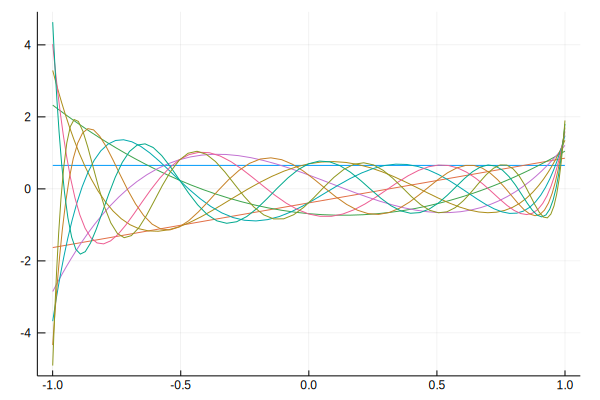

In [33]:
p = plot(; legend=false)
for k=1:10
    plot!(q[k])
end
p

In [34]:
norm(x*q[4] - (b[3]q[3] + a[4]q[4] + b[4]q[5]))

9.45569169473238e-16